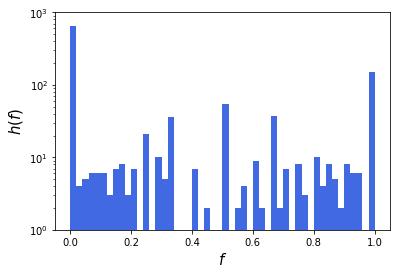

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

db = pd.read_csv('lc_db_processed.csv')[['test_cas', 'conc1_mean', 'fish']]
db = db.groupby(['test_cas', 'fish']).agg('median').reset_index()
db['conc1_mean'] = np.where(db['conc1_mean'] > 1, 0, 1)

lst = list()
lst_cas = list()
for tc in db.test_cas.unique():
    tmp = db[['conc1_mean','fish']][db.test_cas == tc]
    if len(tmp.fish.unique()) == 1:
        continue
    try:
        lst.append(tmp.conc1_mean.value_counts()[1]/len(tmp))
        lst_cas.append(tc)
    except:
        lst.append(0)
        lst_cas.append(tc)

plt.hist(lst, bins = 50, log = True, color = 'royalblue')
plt.xlabel(r'$f$', fontsize = 15)
plt.ylabel(r'$h(f)$', fontsize = 15)
plt.ylim(10**0, 10**3)
plt.show()

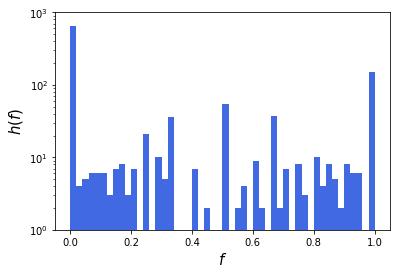

In [10]:
plt.hist(lst, bins = 50, log = True, color = 'royalblue')
plt.xlabel(r'$f$', fontsize = 15)
plt.ylabel(r'$h(f)$', fontsize = 15)
plt.ylim(10**0, 10**3)
plt.savefig(r'C:\Users\Simone\Desktop\prop_tox_chem.png')

In [ ]:
plt.ylabel